<a href="https://colab.research.google.com/github/TinasheMafumbate/hello-world/blob/master/cnn_Inception_wknpr1536_90_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sys

# Confirm that we're using Python 3
assert sys.version_info.major is 3, 'Oops, not running Python 3. Use Runtime > Change runtime type'

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


## Abstract

The thrust of this study is on instituting measures that can speed up the testing and detection of Covid 19, a pandemic which has already wreaked havoc in societies and the economy while distinguishing it from other viral infections such as pneumonia. As one of the mitigatory measures, accuracy in testing is considerd a positive stride in combating the pandemic. Machine Learning, specifically Deep Learning is hereby applied to complement the testing efforts and early detection of Covid-19.

In this paper, 1125 X-Ray images were used as the basis of this project with three (3) classes: 125 Covid-19, 500 No Covid and 500 Pneumonia. Given the 2D images of these three categories, we developed a Deep Convolutional Neural Network (DCNN) model for multiclassification of the images into the 3 categories as well as prediction of classes, given new xray images. Convolutional Neural Networks, a category of Deep Neural Network (DNN) for computer vision was adopted together with Transfer Learning as a starting point for the model development. In this case we adopted the Inception as the base model for Transfer Learning. The developed model was tested with accuracy of 89.10 % and loss of 0.034.

This paper describes considerations of experimental set up, computational efficiency, Transfer Learning, hyper parameter tuning, as well as model checkpointing and early stopping.

## Convolutional Neural Network

Convolutional Neural Networks (CNN) are a category of Neural Networks that are effective in areas of computer vision such as image recognition, classification, and character recognition. Deep Convolutional Neural Networks (DCNN) are enhanced through adding multiple layers through which an image input will be processed.

CNNs imply finding a function $f$ that maps a 2D input image is of pixels $x \in {R}^{m * n * c}$, with $m$ rows,$n$ columns and $c$ channels, to produce an output image $y$ denoted by $f: \to y \in R^{m_{i}*n_{i}*c_{i}}$. 

DCNN consists of one or more convolutional layers followed by one or more fully connected layers as in an architecture allows the DCNN to leverage the spatial and temporal structure of the input and allows the network to learn more complex features from different parts of the input. 














Fig 1 below outlines the architecture of DCNN.






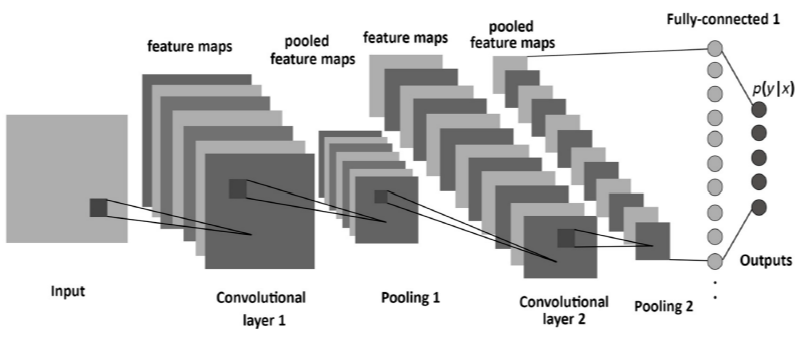

**Fig 1**:General Architecture of DCNN

A Convolutional Neural Network (CNN) comprises of the following components that aim from extracting input features of images upto classifying:
* The convolution: This layer extract spartial and temporal features from  input images i.e X-ray images, resulting in convolved features (feature maps). A convolutional layer applies a kernel to its input by performing several convolutions in parallel (producing a set of linear activations); each linear activation is run through a nonlinear activation function (eg ReLU); and applies a pooling function further modify the output of the layer. 

* The Pooling: Pooling (Max, Average, Sum) or subsampling or downsampling reduces the dimensionality of each feature map but retains the most important information, using  Max, Average, Sum etc. This is explained in detail on the keras code section.

* Flattening convets a 2D image into 1D array of input, for input into the Fully Connected layer.
* Fully Connected Layer: This is Multi Layer Perceptron (MLP) - that  has densely connected neurons with a softmax or sigmoid activation function in the output layer. 





## Transfer Learning using Inception v3

Transfer learning allows for building of models in a timesaving way by adopting and reusing a pre-trained model as a starting point for model development. We then fine tune the model to fit into our case.

We have adopted Inception v3 model, which was pre-trained to classify 1.2 million Imagenet dataset images into 1000 classes. With a top accuracy of 93.7% [Imagenet](https://keras.io/api/applications/), demonstrates the ability to generalise images even outside the ImageNet. 


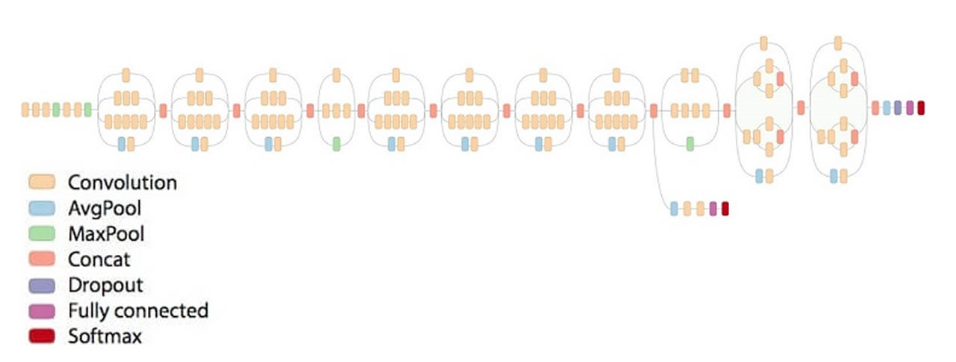

Fig 2 : Architecture of the Inception V3 model

Apart from the issue of high accuracy rates demonstrated, the choice for Inception is driven also by the problem we intend to solve.  We considered that adopting a model which was previously trained for image classification would guarantee improved results rather than taking for example a speech recognition model as a starting point.

The Inception model, which has pretrained 23,851,784 parameters is comparably small in size (92MB), satisfying considerations of memory efficiency during deployment. The task hereby is to finetune the model, adopting the weights of the trained model.

We show the implementation of transfer learning using Inception v3 model:

### Importing libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg 
%matplotlib inline

from tensorflow.keras.utils import plot_model

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import  Dropout, Dense,GlobalMaxPooling2D, AveragePooling2D, GlobalAveragePooling2D , Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.applications import InceptionV3,InceptionResNetV2
from tensorflow.keras import optimizers
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator


from keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.layers import Activation, Dropout, BatchNormalization, Flatten, Dense
from glob import glob

import os


In [ ]:
tf.random.set_seed(1234) 

### Viewing the directory and loading the datasets

# Exploratory Data Analysis 

In [ ]:
working_dir = "/content/drive/My Drive/Colab Notebooks/X-Ray Image dataset"
count=0
for folder in (os.listdir(working_dir)):
  count+=1
  print("{}. {}".format(count,folder))
 

1. Pneumonia
2. No_Covid-19
3. Covid-19


There are three classes of images as contained in the parent directory of Xray images: **No_Covid-19**,**Pneumonia** and **Covid-19**. These are the basis of the classification categories concerned in this model development. It is either a sample image is Covid 19 positive, Covid 19 negative (Normal) or Pneumonia. We will develop a deep convolutional neural network to categorically predict classification of the images. 

In [ ]:
covid_images = os.listdir(working_dir + "/Covid-19")
Pneumonia_images = os.listdir(working_dir + "/Pneumonia")
No_Covid_images = os.listdir(working_dir + "/No_Covid-19")

We can view the sizes of the 3 classes of images contained, graphically.

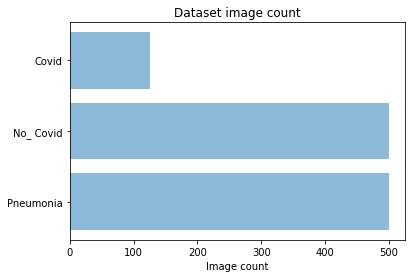

In [ ]:
labels = 'Pneumonia', 'No_ Covid', 'Covid'
y_pos = np.arange(len(labels))
values = [len(Pneumonia_images),len(No_Covid_images),len(covid_images)]

plt.barh(y_pos, values, align='center', alpha=0.5)
plt.yticks(y_pos, labels)
plt.xlabel('Image count')
plt.title('Dataset image count')

plt.show()

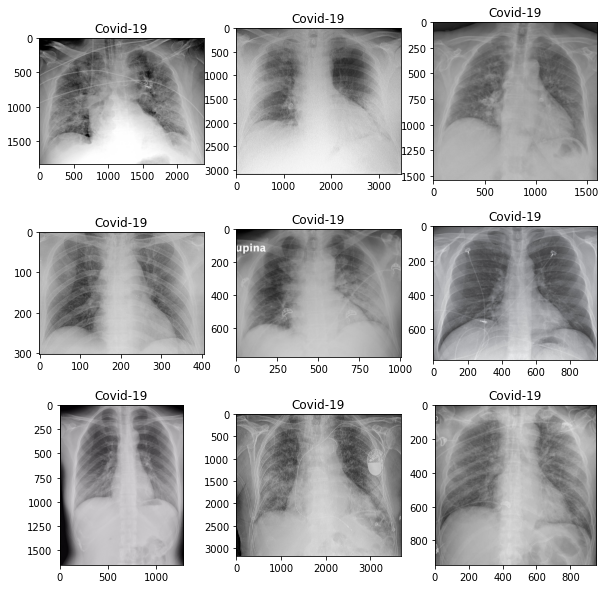

In [ ]:
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(plt.imread(os.path.join(working_dir + "/Covid-19",covid_images[i])),cmap='gray')
    plt.title("Covid-19")
plt.show()

In [ ]:
len(covid_images)

125

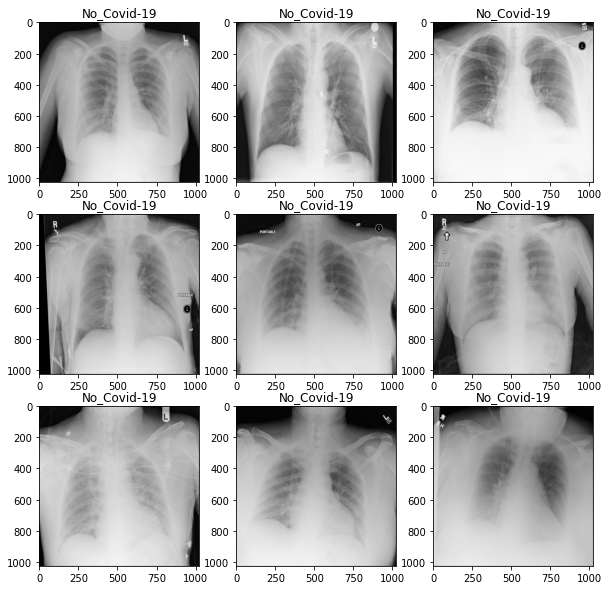

In [ ]:
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(plt.imread(os.path.join(working_dir + "/No_Covid-19",No_Covid_images[i])),cmap='gray')
    plt.title("No_Covid-19")
plt.show()

In [ ]:
len(No_Covid_images)

500

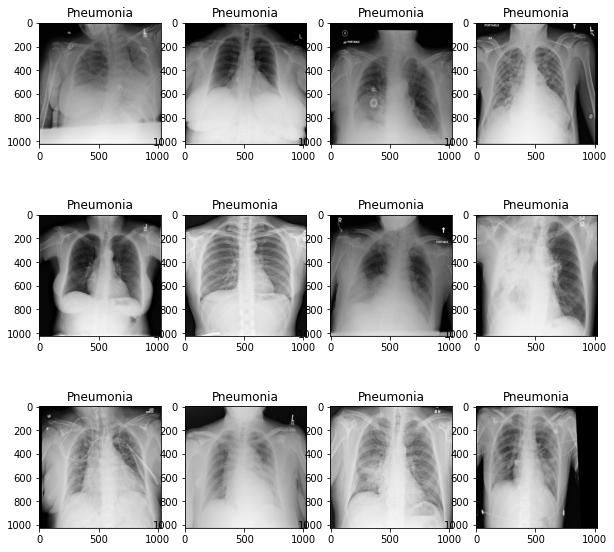

In [ ]:
plt.figure(figsize=(10,10))
for i in range(12):
    plt.subplot(3, 4, i + 1)
    plt.imshow(plt.imread(os.path.join(working_dir + "/Pneumonia",Pneumonia_images[i])),cmap='gray')
    plt.title("Pneumonia")
plt.show()

In [ ]:
len(Pneumonia_images)

500

In [ ]:
total_images = len(covid_images) + len(Pneumonia_images) + len(No_Covid_images)
total_images

1125

## Image Preprocessing and data augmentation

We start by inspecting the first image in the training set we can  see that the pixel values fall in the range 0 to 255, and later use preprocessing dependencies for the image input.


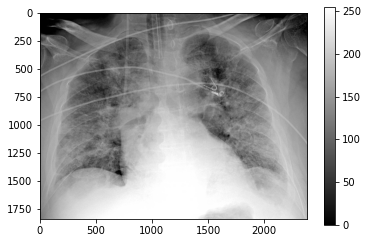

In [ ]:
plt.figure()
plt.imshow(plt.imread(os.path.join(working_dir + "/Covid-19",covid_images[0])),cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()

Preprocessing refers to all the transformations on the raw image data before it is fed to the DCNN such as centering, whitening and scaling techniques. Training a DCNN on raw images may lead to poor performances. Preprocessing is also important to speed up training of the model. 

It is part of feature engineering, ensuring that the image inputs are of required sizes and that sufficient data is available to training the model. 




 

## ImageGenerator
 For image preprocessing we have used Image Generator class (`tf.keras.preprocessing.image.ImageDataGenerator`), an image data augmentation technique that can be used to expand the size of a training dataset by generating batches of tensor image data in the dataset using methods such as horizontal_flip (randomly flipping half of the images horizontally), shear (transformation), randomly rotating the image, random cropping, zooming, validation_split (setting to 20% of the dataset) and rescale. 

By rescale, we scale image pixel values to a range between 0 and 1   before feeding them to the deep neural network model. The original images consist of RGB coefficients in the range 0-255, but such values would be too high for the model to process, so we target values between 0 and 1  by scaling with a 1/255. factor.Both the training set and the validation set are preprocessed in the same way. 

In this case where we have limited dataset, data augmentation will also come in as a regularisation method, randomly generating more image data to avoid overfitting.

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
    )

We aim to extend the ImageGenerator class to:
* obtain the location of dataset (working_dir),

* set the image input size (299 x 299). The consideration for setting image size to 299 x 299 is obtained from that the Inception v3 model was trained on the same image sizes, so adopting it improves performance of the model. 

    Also considering  radiological imagery recommendations , Xray
    images should be optimised for high resolutions (448 x 448) to
    capture spartial and temporal features of the image (Sabottke & 
    Spieler,2020). However, the optimisations should balance with the 
    possible model input size for improved performance.

    However, limitations on computational resources  prompted for reduced size to 299x299, while we aim to balance it with batch size during model training beacause increasing image resolution for DCNN training often has a trade-off with the maximum possible batch size.

* batch size (Initially set to 15). The consideration here is to use a smaller **mini batch** size although increasing the number of iterations. Other options for batch sizes **stochastic mode** where batch size is 1; **batch mode** where batch size is equal to the total dataset. So we inially set 15 as the batch size, that can divide into the training data (900) and validation data (225).

* class mode : categorical (3 categories) for the training and validation sets.



In [ ]:
train_generator = train_datagen.flow_from_directory(
    working_dir,
    target_size=(299,299),
    batch_size=30,
    class_mode='categorical',
    subset='training')

Found 900 images belonging to 3 classes.


In [ ]:
validation_generator = train_datagen.flow_from_directory(
    working_dir, 
    target_size=(299,299),
    batch_size=30,
    class_mode='categorical',
    subset='validation')

Found 225 images belonging to 3 classes.


We can see that the ImageGenerator has split the dataset into 80% training data and 20% validation data with all the three classes. The generator class has also labelled the data according to the class in which the images are contained.

To view and further use the labels (since its a supervised learning), we can call the class indices for both the training and validation sets and they have to be the same. We can as well view the shapes of the generated images. In this case a 299 x 299 image of 3 channels (rgb) and batch of 15.

In [ ]:
# Using tf.keras.utils.Sequence to view the shape of the training and validation images
print("Training set ", train_generator.__getitem__(0)[0].shape)
print("Validation set ", validation_generator.__getitem__(0)[0].shape)
print(train_generator.class_indices)
print(validation_generator.class_indices)

Training set  (30, 299, 299, 3)
Validation set  (30, 299, 299, 3)
{'Covid-19': 0, 'No_Covid-19': 1, 'Pneumonia': 2}
{'Covid-19': 0, 'No_Covid-19': 1, 'Pneumonia': 2}


The three classes are class 0 (Covid-19), class 1 (No_Covid-19) and Class 2 (Pneumonia) will be the domain of prediction at the final layer of the fully connected layer using softmax (multi classification).

Taking a look at the generated training set we have a combination of all classes representaed as below.

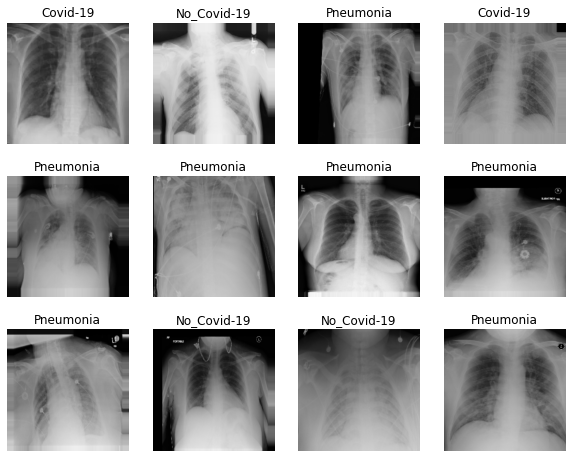

In [ ]:
classes = ['Covid-19', 'No_Covid-19', 'Pneumonia']

data = train_generator.__getitem__(1)[0] 
label = train_generator.__getitem__(1)[1] 

plt.figure(figsize=(10,8))
for i in range(12):
    plt.subplot(3, 4, i + 1)
    plt.axis('off')
    plt.imshow(data[i])
    plt.title(classes[np.argmax(label[i])])

We can see the combination of the three classes contained in the training, the same way it is in the validation set.


## Implementation of Transfer learning model

In [ ]:
# A function that will be called for plotting the graphs of accuracy and loss values

def plot_acc_loss(result, epochs):
    acc = result.history['accuracy']
    loss = result.history['loss']
    val_acc = result.history['val_accuracy']
    val_loss = result.history['val_loss']
    plt.figure(figsize=(15, 5))
    plt.subplot(121)
    plt.plot(range(1,epochs), acc[1:], label='Train_acc')
    plt.plot(range(1,epochs), val_acc[1:], label='Test_acc')
    plt.title('Accuracy over ' + str(epochs) + ' Epochs', size=15)
    plt.legend()
    plt.grid(True)
    plt.subplot(122)
    plt.plot(range(1,epochs), loss[1:], label='Train_loss')
    plt.plot(range(1,epochs), val_loss[1:], label='Test_loss')
    plt.title('Loss over ' + str(epochs) + ' Epochs', size=15)
    plt.legend(['train', 'test'], loc='upper left')
    plt.grid(True)
    plt.show()

In [ ]:
filepath="inception_weights.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True)
lr_reduce = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, min_delta=0.0001, patience=3, verbose=1)
es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=1)



We create the base pre-trained model (Inception v3) with weights from the ImageNet (where the model was pre-trained). So we download the base model with its pre-trained weights, excluding the last layer of model (the fully connected) by  `include_top false`. We also specify the input shape, in this case we have to use the default with which the Inception v3 model was trained on.

## Model Components
Inception-v3 model concatenates multiple different sized convolutional filters with an objective to decrease the number of parameters to be trained and subsequently reducing computational complexity.

The model contains convolution layers of different sizes and pooling layers (for downsampling) and a fully connected layer (which we have removed its output layer).

*Taking a look at the first convolution*:


>` model.add(Conv2D(32, (3, 3), input_shape = (299, 299, 3), activation = 'relu'))`;
for a convolution with 32 output filters of size 3 x 3 and input shape of 299 x 299 and a colr depth of 3 (rgb). The filter calculates the dot product of the image values per each stride.



*Batch normalisation*: to improve the speed, performance, and stability of CNN by standardising the outpus based on other outputs.



*Pooling* :

`model.add(MaxPooling2D(pool_size = (2, 2),strides=(1, 1), padding='valid'))`

This is a 2 x 2 Max pooling in which calculates the maximum values in the matrix of each convolved feature, thereby further reducing the size of feature maps at every stride of 1.

For an input image, a 2048-dimensional feature is extracted from the last fully-connected layer (shown in the base_model summary). We added a fully connected layer and an output layer with softmax for categorical class output.




In [ ]:
# create the base pre-trained model
base_model = InceptionV3(weights='imagenet', 
                          include_top=False,
                          input_shape=(299, 299, 3))

87916544/87910968 [==============================] - 3s 0us/step


In [ ]:
image_batch, label_batch = next(iter(train_generator))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(30, 8, 8, 2048)


In [ ]:
base_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 149, 149, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

## Fine tuning the model

**Partial training** , selective training of layers while keeping othes frozen was considered.

Considerations (partial training, feature extraction or adopt model archiecture only) for the choice here depend on data similarlity and the size of the dataset. We embarked on partial training of the model , based on the small size of the dataset that we have as well as low similarlity of data (between our dataset and the Imagenet dataset). There are other considerations for utilising pretrained models.

We fine tuned the top layer of the base model by concatenating the base model to the fully connected layer and  adding a softmax output layer. The architecture diagram of the new model is plotted below.


In [ ]:
base_model.trainable = False

In [ ]:
# add a global spatial maximum pooling layer
x = base_model.output
x = GlobalMaxPooling2D()(x)
x = Dense(64, activation='tanh')(x)
predictions = Dense(3, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
for layer in model.layers:
    layer.trainable = True
    if isinstance(layer, tf.keras.layers.BatchNormalization): 

      # we do exponential smoothing of batch norm
      # parameters to faster adjust to our new dataset
      layer.momentum = 0.9
    
# fix deep layers (fine-tuning only last 50)
for layer in model.layers[:-50]:
    # fix all but batch norm layers, because we need to update moving averages for a new dataset!
    if not isinstance(layer, tf.keras.layers.BatchNormalization):
        layer.trainable = False


In [ ]:
model.compile(loss=tf.keras.losses.categorical_crossentropy ,
              #optimizer=tf.keras.optimizers.RMSprop(lr=0.01, decay=1e-6),   
             # optimizer=tf.keras.optimizers.SGD(lr=0.01, momentum=0.9),
              optimizer=tf.keras.optimizers.Nadam(lr=0.001, decay=1e-6),  
              metrics=['accuracy'])

# fitting the model
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples// 30,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples//30,
    epochs = 50,
    callbacks=[es_callback,lr_reduce,checkpoint]
    )



Epoch 1/50
30/30 [==============================] - ETA: 0s - loss: 0.0858 - accuracy: 0.9700
Epoch 00001: val_accuracy did not improve from 0.88571
30/30 [==============================] - 44s 1s/step - loss: 0.0858 - accuracy: 0.9700 - val_loss: 0.5979 - val_accuracy: 0.8381
Epoch 2/50
30/30 [==============================] - ETA: 0s - loss: 0.0927 - accuracy: 0.9700
Epoch 00002: val_accuracy did not improve from 0.88571
30/30 [==============================] - 42s 1s/step - loss: 0.0927 - accuracy: 0.9700 - val_loss: 0.5414 - val_accuracy: 0.8381
Epoch 3/50
30/30 [==============================] - ETA: 0s - loss: 0.1262 - accuracy: 0.9567
Epoch 00003: val_accuracy did not improve from 0.88571
30/30 [==============================] - 42s 1s/step - loss: 0.1262 - accuracy: 0.9567 - val_loss: 0.5377 - val_accuracy: 0.8190
Epoch 4/50
30/30 [==============================] - ETA: 0s - loss: 0.1185 - accuracy: 0.9556
Epoch 00004: val_accuracy did not improve from 0.88571
30/30 [==========

#Hyper parameter tuning

Our major concern was  to improve model performance and reduce overfitting which we tried to reduce by adjusting the learning rate, changing the optimiser, but in this case we had to leave the relu activation as default in the fully connected layer.

*  We set DropOut regularisation. `x=DropOut(0.25)(x)`

* We reduced number of neurons from `256` to `128` to simplify the fully connected part of the model.


* *Early Stopping*: stopped training after few epochs.

* *Reducing learning rate on runtime*: This is effective for monitoring validaton loss so that it does not diverge without constraints.

* *Data augmetation*: the ImageGenerator class performed the required data augmentation, adding more data in the case of small size of data. By increasing data, overfitting is reduced.





## Architecture diagram of CNN algorithm

In [ ]:
#plot_model(model, show_shapes=True, to_file='inception_model.png')

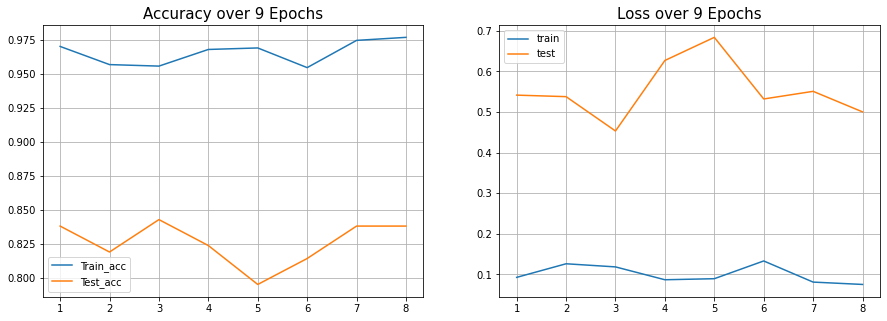

In [ ]:
plot_acc_loss(history, len(history.epoch))

## Evaluating the model

In [ ]:
test_loss, test_acc = model.evaluate(validation_generator,  verbose=1)
print('\nTest accuracy:', test_acc)

8/8 [==============================] - 7s 836ms/step - loss: 0.5455 - accuracy: 0.8267

Test accuracy: 0.8266666531562805


In [ ]:
model.save("incep_model3.hdf5")
print("saved successfully")

saved successfully


## Performance Metrics and Classification report

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from keras.models import load_model

In [ ]:
classes_b1=validation_generator.__getitem__(0)[1] 
classes_b2=validation_generator.__getitem__(1)[1] 
classes_b3=validation_generator.__getitem__(2)[1] 
classes_b4=validation_generator.__getitem__(3)[1] 
classes_b5=validation_generator.__getitem__(4)[1] 
classes_b6=validation_generator.__getitem__(5)[1] 
classes_b7=validation_generator.__getitem__(6)[1] 
classes_b8=validation_generator.__getitem__(7)[1] 

classes_arr=np.concatenate((classes_b1, classes_b2,classes_b3,classes_b4,classes_b5,classes_b6,classes_b7,classes_b8))
classes_val = np.argmax(classes_arr, axis=1)
classes_val

array([2, 1, 2, 1, 2, 1, 1, 1, 0, 2, 1, 1, 1, 2, 0, 1, 1, 2, 2, 2, 2, 2,
       2, 2, 0, 0, 0, 2, 0, 2, 2, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2, 1,
       2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 0, 1, 2, 2, 1, 1, 2, 2, 1, 2, 0, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 1, 1, 2, 1, 1, 0, 0, 2, 1, 2, 2, 1, 2, 1, 0, 2, 2, 0, 1, 0,
       2, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 2, 2, 1, 0, 1, 2, 0, 1, 2,
       1, 2, 2, 1, 2, 1, 2, 1, 1, 0, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 1, 1, 0, 2, 2, 1, 2, 2, 1, 0, 2, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 0, 2, 1, 2, 2, 2, 1, 0, 2, 1, 2, 1, 2, 2,
       1, 0, 2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 2, 2, 2])

In [ ]:
#Confusion Matrix and Classification Report
model=load_model('incep_model3.hdf5')
Y_pred = model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)

print('Confusion Matrix')
print(confusion_matrix(classes_val, y_pred))
print('Classification Report')
classes = ['Covid-19', 'No_Covid-19', 'Pneumonia']

print(classification_report(classes_val, y_pred, target_names=classes))

Confusion Matrix
[[23  0  2]
 [ 1 90  9]
 [ 2 14 84]]
Classification Report
              precision    recall  f1-score   support

    Covid-19       0.88      0.92      0.90        25
 No_Covid-19       0.87      0.90      0.88       100
   Pneumonia       0.88      0.84      0.86       100

    accuracy                           0.88       225
   macro avg       0.88      0.89      0.88       225
weighted avg       0.88      0.88      0.88       225



In [ ]:
from tensorflow.keras.preprocessing import image

classes = ['Covid-19', 'No_Covid-19', 'Pneumonia']

testimg=image.load_img("/content/drive/My Drive/Colab Notebooks/X-Ray Image dataset/Covid-19/1-s2.0-S0929664620300449-gr2_lrg-b.jpg",target_size=(299, 299))
testimg=image.img_to_array(testimg)
testimg=np.expand_dims(testimg,axis=0)
testimg= testimg/255.0
result1=model.predict(testimg)
print(result1)
print(train_generator.class_indices)
print("The image is predicted as class {}: {}".format(np.argmax(result1[0]),classes[np.argmax(result1[0])]))

[[8.4740478e-01 3.2653228e-05 1.5256259e-01]]
{'Covid-19': 0, 'No_Covid-19': 1, 'Pneumonia': 2}
The image is predicted as class 0: Covid-19


In [ ]:
import tensorflow
print(tensorflow.__version__)

2.3.0


## Deployment

Deployment was made with Tensoflow Serving platform , with the following steps and can be obtained on the following link http://localhost:8501/v1/models/covid_model:predict , which is accessible after running on local host.

In [ ]:
# TensorFlow and tf.keras
print("Installing dependencies for Colab environment")
!pip install -Uq grpcio==1.26.0


Installing dependencies for Colab environment
     |████████████████████████████████| 2.4MB 11.3MB/s 


In [ ]:
# Fetch the Keras session and save the model
# The signature definition is defined by the input and output tensors,
# and stored with the default serving key
import tempfile

MODEL_DIR = tempfile.gettempdir()
version = 1
export_path = os.path.join(MODEL_DIR, str(version))
print('export_path = {}\n'.format(export_path))

tf.keras.models.save_model(
    model,
    export_path,
    overwrite=True,
    include_optimizer=True,
    save_format=None,
    signatures=None,
    options=None
    
)

print('\nSaved model:')
!ls -l {export_path}

export_path = /tmp/1

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /tmp/1/assets

Saved model:
total 5992
drwxr-xr-x 2 root root    4096 Aug 23 14:31 assets
-rw-r--r-- 1 root root 6124988 Aug 23 14:31 saved_model.pb
drwxr-xr-x 2 root root    4096 Aug 23 14:31 variables


In [ ]:
!saved_model_cli show --dir {export_path} --all


MetaGraphDef with tag-set: 'serve' contains the following SignatureDefs:

signature_def['__saved_model_init_op']:
  The given SavedModel SignatureDef contains the following input(s):
  The given SavedModel SignatureDef contains the following output(s):
    outputs['__saved_model_init_op'] tensor_info:
        dtype: DT_INVALID
        shape: unknown_rank
        name: NoOp
  Method name is: 

signature_def['serving_default']:
  The given SavedModel SignatureDef contains the following input(s):
    inputs['input_1'] tensor_info:
        dtype: DT_FLOAT
        shape: (-1, 299, 299, 3)
        name: serving_default_input_1:0
  The given SavedModel SignatureDef contains the following output(s):
    outputs['dense_6'] tensor_info:
        dtype: DT_FLOAT
        shape: (-1, 3)
        name: StatefulPartitionedCall:0
  Method name is: tensorflow/serving/predict
Traceback (most recent call last):
  File "/usr/local/bin/saved_model_cli", line 8, in <module>
    sys.exit(main())
  File "/usr/

In [ ]:
!echo "deb http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal" | tee /etc/apt/sources.list.d/tensorflow-serving.list && \
curl https://storage.googleapis.com/tensorflow-serving-apt/tensorflow-serving.release.pub.gpg | apt-key add -
!apt update

deb http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2943  100  2943    0     0  14426      0 --:--:-- --:--:-- --:--:-- 14497
OK
Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Hit:3 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:4 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Get:8 http://storage.googleapis.com/tensorflow-ser

In [ ]:
!apt-get install tensorflow-model-server

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  tensorflow-model-server
0 upgraded, 1 newly installed, 0 to remove and 60 not upgraded.
Need to get 210 MB of archives.
After this operation, 0 B of additional disk space will be used.
Get:1 http://storage.googleapis.com/tensorflow-serving-apt stable/tensorflow-model-server amd64 tensorflow-model-server all 2.3.0 [210 MB]
Fetched 210 MB in 3s (75.9 MB/s)
Selecting previously unselected package tensorflow-model-server.
(Reading database ... 144487 files and directories currently installed.)
Preparing to unpack .../tensorflow-model-server_2.3.0_all.deb ...
Unpacking tensorflow-model-server (2.3.0) ...
Setting up tensorflow-model-server (2.3.0) ...


In [ ]:
os.environ["MODEL_DIR"] = MODEL_DIR

In [ ]:
%%bash --bg 
nohup tensorflow_model_server \
  --rest_api_port=8501 \
  --model_name=covid_model \
  --model_base_path="${MODEL_DIR}" >server.log 2>&1

Starting job # 0 in a separate thread.


In [ ]:
!tail server.log

To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2020-08-22 11:18:07.469925: I external/org_tensorflow/tensorflow/cc/saved_model/loader.cc:199] Restoring SavedModel bundle.
2020-08-22 11:18:08.224331: I external/org_tensorflow/tensorflow/cc/saved_model/loader.cc:183] Running initialization op on SavedModel bundle at path: /tmp/1
2020-08-22 11:18:08.480850: I external/org_tensorflow/tensorflow/cc/saved_model/loader.cc:303] SavedModel load for tags { serve }; Status: success: OK. Took 1237776 microseconds.
2020-08-22 11:18:08.512684: I tensorflow_serving/servables/tensorflow/saved_model_warmup_util.cc:59] No warmup data file found at /tmp/1/assets.extra/tf_serving_warmup_requests
2020-08-22 11:18:08.512818: I tensorflow_serving/core/loader_harness.cc:87] Successfully loaded servable version {name: covid_model version: 1}
2020-08-22 11:18:08.515015: I tensorflow_serving/model_servers/server.cc:367] Running gRPC ModelServer at 0.0.0.0:8500 ...
[wa

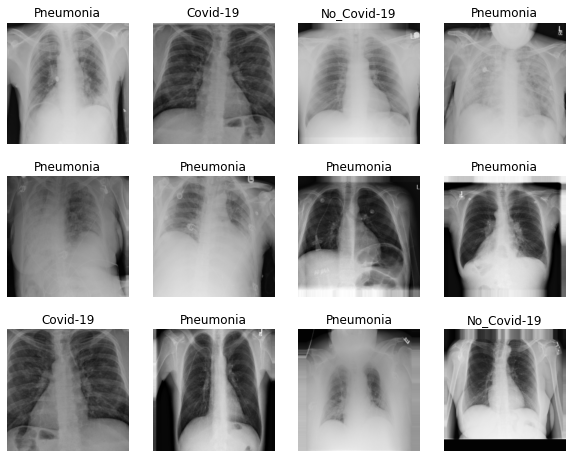

In [ ]:
data = train_generator.__getitem__(1)[0] 
label = train_generator.__getitem__(1)[1] 

plt.figure(figsize=(10,8))
for i in range(12):
    plt.subplot(3, 4, i + 1)
    plt.axis('off')
    plt.imshow(data[i])
    plt.title(classes[np.argmax(label[i])])

In [ ]:
classes = ['Covid-19', 'No_Covid-19', 'Pneumonia']

data1 = validation_generator.__getitem__(1)[0] 
label = train_generator.__getitem__(1)[1] 

import json
data = json.dumps({"signature_name": "serving_default", "instances": data1[0:3].tolist()})
print('Data: {} ... {}'.format(data[:50], data[len(data)-52:]))

Data: {"signature_name": "serving_default", "instances": ... 0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0]]]]}


In [ ]:
!pip install -q requests

In [ ]:
import requests
headers = {"content-type": "application/json"}
json_response = requests.post('http://localhost:8501/v1/models/covid_model:predict', data=data, headers=headers)
predictions = json.loads(json_response.text)['predictions']

print(0, 'The model predicts that the image is in class {} (class {}), and it was actually a {} (class {})'.format(
  validation_generator.classes[np.argmax(predictions[0])], np.argmax(predictions[0]), validation_generator.classes, validation_generator.classes))

0 The model predicts that the image is in class 0 (class 1), and it was actually a [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2] (class [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2

1. Lai, Z., & Deng, H. (2018). Medical image classification based on deep features extracted by deep model and statistic feature fusion with multilayer perceptron. Computational Intelligence and Neuroscience, 2018. https://doi.org/10.1155/2018/2061516

2. Pelt, D. M., & Sethian, J. A. (2017). A mixed-scale dense convolutional neural network for image analysis. Proceedings of the National Academy of Sciences of the United States of America, 115(2), 254–259. https://doi.org/10.1073/pnas.1715832114